In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data = pd.read_csv(r"C:\Users\ASUS\Downloads\UberDataset.csv")

In [42]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [44]:
data.shape

(1156, 7)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [48]:
data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

# DATA PREPROCESSING

In [51]:
data['PURPOSE'].fillna('NOT', inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7228\1494433854.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PURPOSE'].fillna('NOT', inplace = True)


In [61]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [59]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors = 'coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE'], errors = 'coerce')

In [69]:
from datetime import datetime

data['date'] = pd.DatetimeIndex(data['START_DATE']).date
data['time'] = pd.DatetimeIndex(data['START_DATE']).hour


In [107]:
data['day-night'] = pd.cut(x = data['time'], bins = [0,10,15,19,24], labels = ['Morning','Afternoon','Evening','Night'])

In [109]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [73]:
data.dropna(inplace = True)

In [77]:
data.shape

(420, 9)

In [ ]:
#QUESTION
#1. In which Category do people book the most uber rides?
#2. For which purpose do people book Uber rides the most?
#3. At what time do people book cabs the most from uber?
#4. In which months do people book uber rides less frequently?
#5. On which days of the week do people book uber rides the most?
#6. How many miles do people usually book a cab from uber?

# DATA VISUALIZATION

<Axes: xlabel='count', ylabel='PURPOSE'>

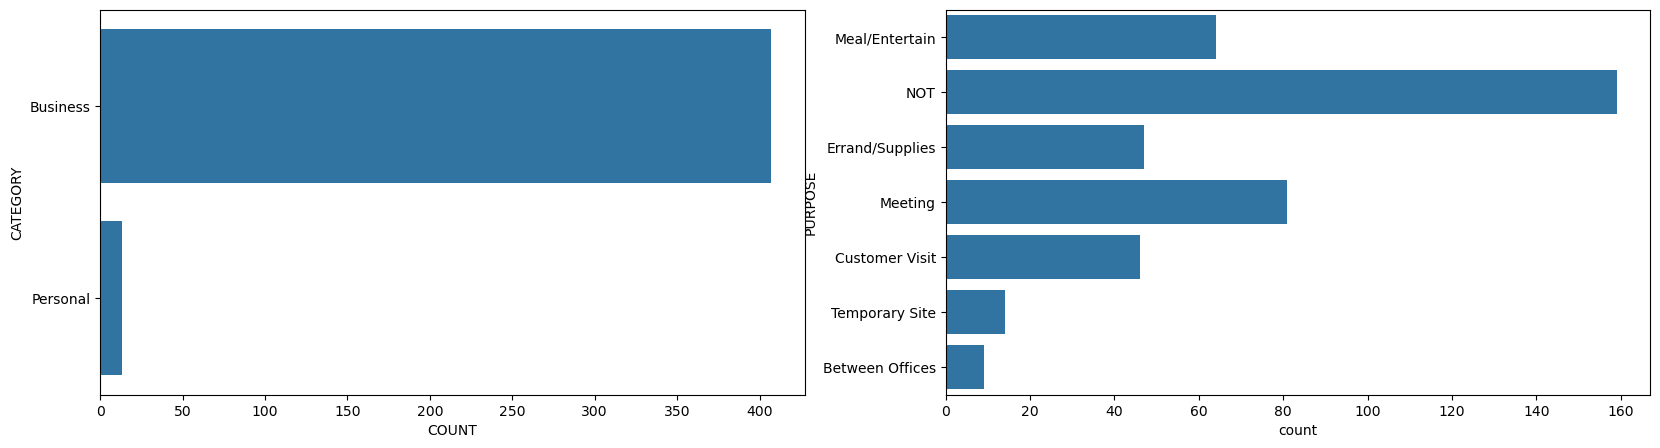

In [128]:
# 1
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(data['CATEGORY'])
plt.xlabel('COUNT')
plt.ylabel('CATEGORY')

# 2
plt.subplot(1,2,2)
sns.countplot(data['PURPOSE'])

<Axes: xlabel='count', ylabel='day-night'>

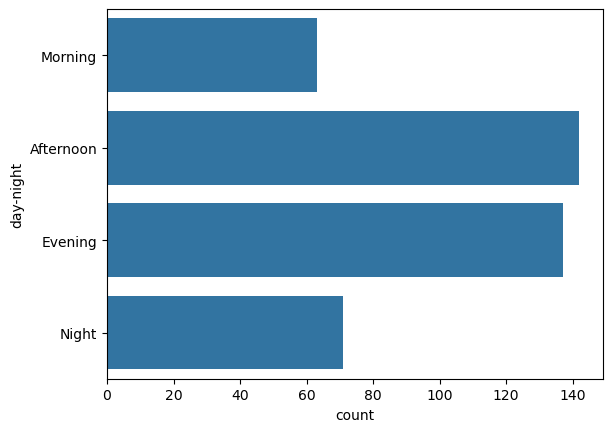

In [115]:
3.
sns.countplot(data['day-night'])

In [117]:
# CONVERT DATES TO MONTHS
data['MONTH'] = pd.DatetimeIndex(data['START_DATE']).month #Extract the month from START_DATE

month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',5.0: 'May', 6.0: 'June', 7.0: 'July',8.0: "Aug",
              9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'} # Assign the months into strings name

data['MONTH'] = data.MONTH.map(month_label) # Replacing number in months to string names

mon = data.MONTH.value_counts(sort = False) #Calculating the months counts

In [119]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


In [124]:
df = pd.DataFrame({
    "MONTHS" : mon.values, # Total Count of Every Month
    "VALUE COUNT" : data.groupby("MONTH", sort = False)["MILES"].max() #Value of max miles for the month
}) 

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

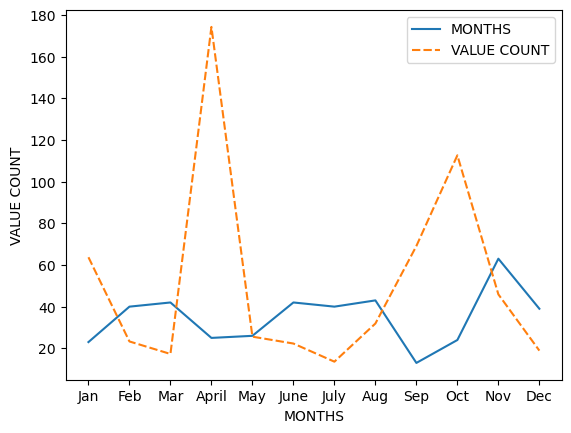

In [126]:
# 4
plot = sns.lineplot(data = df)
plot.set(xlabel = "MONTHS", ylabel = "VALUE COUNT")

In [134]:
data["DAY"] = data.START_DATE.dt.weekday

week_label = {
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}

data['DAY'] = data['DAY'].map(week_label)

In [136]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


Text(0, 0.5, 'COUNT')

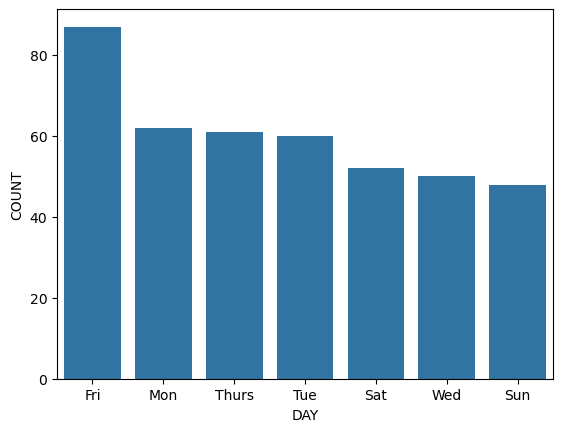

In [138]:
# 5
week_label = data.DAY.value_counts()

sns.barplot(x = week_label.index, y = week_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: ylabel='MILES'>

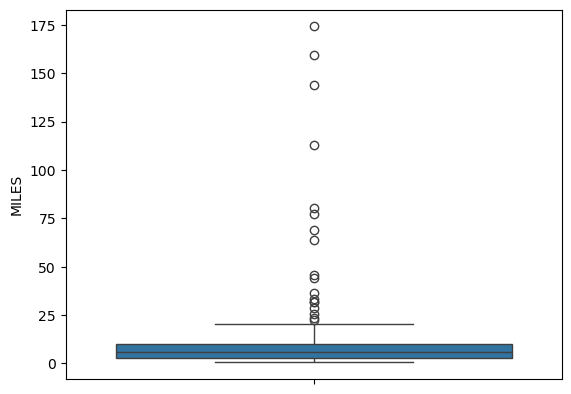

In [141]:
# 6
sns.boxplot(data['MILES'])

<Axes: ylabel='MILES'>

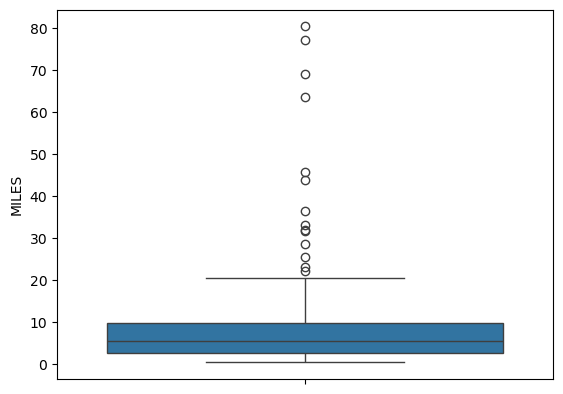

In [149]:
sns.boxplot(data[data['MILES']<100]["MILES"])

<Axes: ylabel='MILES'>

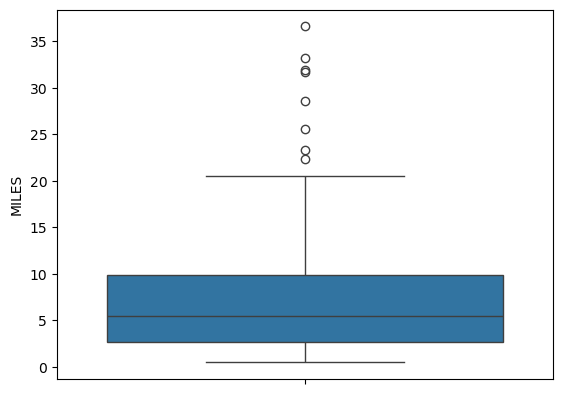

In [153]:
sns.boxplot(data[data['MILES']<40]["MILES"])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7228\4203320192.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["MILES"]<40]["MILES"])


<Axes: xlabel='MILES', ylabel='Density'>

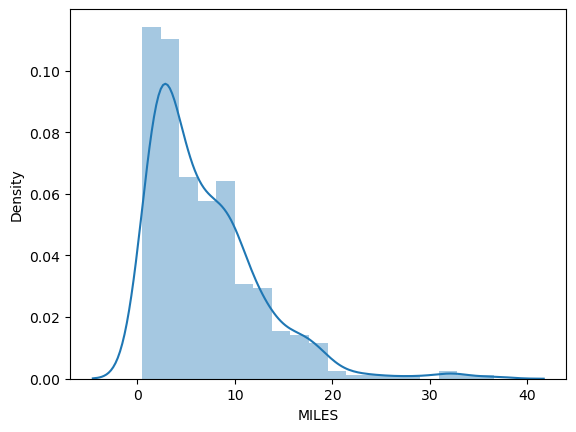

In [155]:
sns.distplot(data[data["MILES"]<40]["MILES"])